0. Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt

In [2]:
class AdalineSGD(object):
    
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii = 100, shuffle = True, random_state=None):
       
        self.rychlost_ucenia = rychlost_ucenia
        self.pocet_iteracii = pocet_iteracii
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self,X,y):
        
        self._initialize_weights(X.shape[1])
        self.cost_=[]
        
        for i in range (self.pocet_iteracii):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost =[]
            
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self,X,y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0]>1:
             for xi,target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self

    def _shuffle(self,X,y):
        r =np.random.permutation(len(y))
        return X[r],y[r]
    
    def _initialize_weights(self,m):
        self.w_ =np.zeros(1+m)
        self.w_initialized = True
        
    def _update_weights(self,xi,target):
        
        output = self.net_input(xi)
        error = (target-output)  
        self.w_[1:] += self.rychlost_ucenia *xi.dot(error)
        self.w_[0] += self.rychlost_ucenia *error
        
        cost = 0.5*error**2
        return cost
        
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def linearna_aktivacia(self,X):
        return self.net_input(X)
    
    def predikcia(self,X):
        return np.where(self.linearna_aktivacia(X)>=0.0,1,-1) 

In [3]:
# dataframe (add own path)
data = pd.read_csv('/content/drive/MyDrive/Škola/NS/cvicenie_5/kosatec_data.csv', header = None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,kosatec_sibirsky
1,4.9,3.0,1.4,0.2,kosatec_sibirsky
2,4.7,3.2,1.3,0.2,kosatec_sibirsky
3,4.6,3.1,1.5,0.2,kosatec_sibirsky
4,5.0,3.6,1.4,0.2,kosatec_sibirsky
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,kosatec_bezlisty
146,6.3,2.5,5.0,1.9,kosatec_bezlisty
147,6.5,3.0,5.2,2.0,kosatec_bezlisty
148,6.2,3.4,5.4,2.3,kosatec_bezlisty


In [4]:
maticaX_trenovacie = data.iloc[0:80,[0,2]].values

maticaX_testovacie = data.iloc[80:100,[0,2]].values

y = np.where((data.iloc[80:100,4]) == 'kosatec_sibirsky',-1,1)

In [5]:
x_stdTrenovacie = preprocessing.scale(maticaX_trenovacie)
x_stdTestovacie = preprocessing.scale(maticaX_testovacie)

In [6]:
# pomiesanie
np.random.shuffle(maticaX_trenovacie)
np.random.shuffle(maticaX_testovacie)

In [7]:
# pomiesanie
np.random.shuffle(x_stdTrenovacie)
np.random.shuffle(x_stdTestovacie)

In [8]:
# create object
adalineSGD = AdalineSGD()
adalineSGD.partial_fit(maticaX_trenovacie,y)

Text(0.5, 1.0, 'rychlost ucenia 0.01')

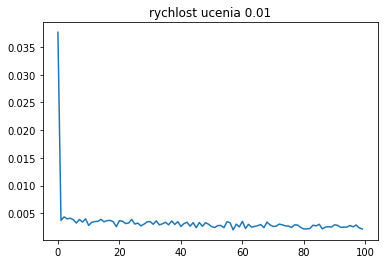

In [9]:
# train (testing)
adalineSGD.fit(maticaX_testovacie,y)

adalineSGD.rychlost_ucenia = 0.01
plt.plot(adalineSGD.cost_)
plt.title("rychlost ucenia 0.01")

Text(0.5, 1.0, 'rychlost ucenia 0.0005')

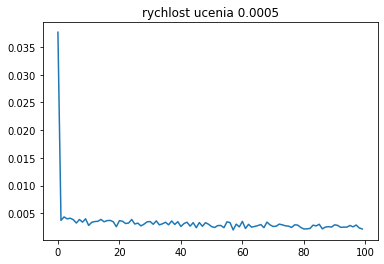

In [10]:
adalineSGD.rychlost_ucenia = 0.0005
plt.plot(adalineSGD.cost_)
plt.title("rychlost ucenia 0.0005")